<a href="https://colab.research.google.com/github/BhagwatiOracle/Deep-Learning/blob/main/BatchNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving placement (2).csv to placement (2).csv


In [3]:
df = pd.read_csv('/content/placement (2).csv')

In [4]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


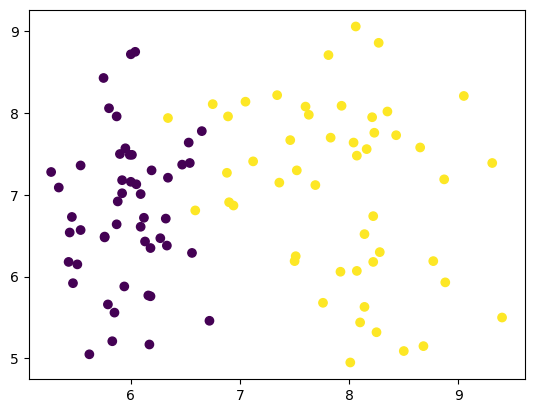

In [5]:
plt.scatter(df['cgpa'],df['resume_score'],c=df['placed'])

In [6]:
x=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

**Without BatchNormalization**

In [8]:

model = Sequential()

model.add(Dense(2,activation='relu',input_shape=(2,)))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
history1=model.fit(x,y,epochs=200,validation_split=0.2)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.5336 - loss: 0.7453 - val_accuracy: 0.4500 - val_loss: 0.7985
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5102 - loss: 0.7623 - val_accuracy: 0.4500 - val_loss: 0.7923
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5180 - loss: 0.7483 - val_accuracy: 0.4500 - val_loss: 0.7869
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5219 - loss: 0.7447 - val_accuracy: 0.4500 - val_loss: 0.7815
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5102 - loss: 0.7453 - val_accuracy: 0.4500 - val_loss: 0.7763
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5336 - loss: 0.7218 - val_accuracy: 0.4500 - val_loss: 0.7713
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5297 - loss: 0.7254 - val_accuracy: 0.4500 - val_loss: 0.7665
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5258 - loss: 0.7244 - val_accuracy: 0.4500 - val_loss

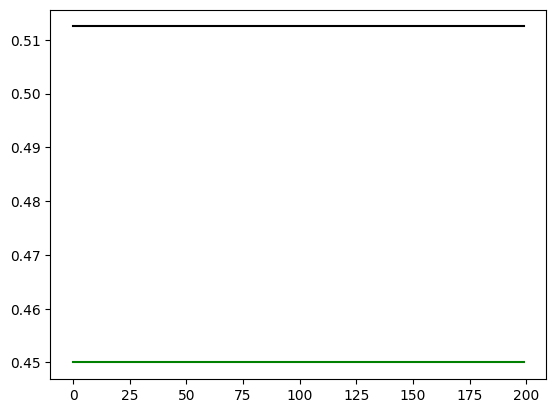

In [11]:
plt.plot(history1.history['accuracy'],color='black')
plt.plot(history1.history['val_accuracy'],color='green')

**After BatchNormalization**

In [13]:
model=Sequential()
model.add(Dense(3,activation='relu',input_shape=(2,)))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history2 = model.fit(x,y,epochs=200,validation_split=0.2)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 858ms/step - accuracy: 0.6031 - loss: 0.6749 - val_accuracy: 0.4500 - val_loss: 0.6968
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.6727 - loss: 0.6576 - val_accuracy: 0.4500 - val_loss: 0.6967
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6070 - loss: 0.6790 - val_accuracy: 0.4500 - val_loss: 0.6965
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6336 - loss: 0.6872 - val_accuracy: 0.4500 - val_loss: 0.6964
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6078 - loss: 0.6794 - val_accuracy: 0.4500 - val_loss: 0.6963
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6570 - loss: 0.6654 - val_accuracy: 0.4500 - val_loss: 0.6964
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6930 - loss: 0.6463 - val_accuracy: 0.4500 - val_loss: 0.6966
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.6352 - loss: 0.6610 - val_accuracy: 0.4500 - val_

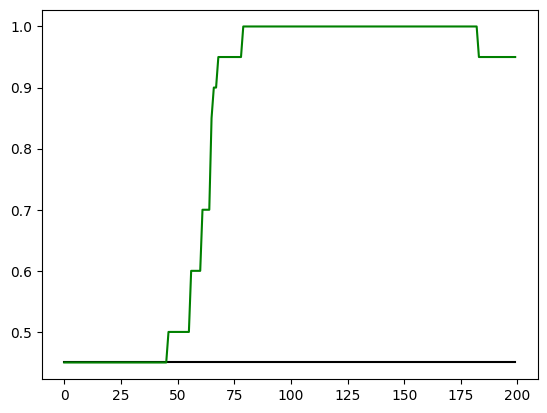

In [18]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')